In [148]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_data = sio.loadmat('TrialMatrix.mat')

C1_1_array = mat_data['C1_1_Trials']


cancer_testing = mat_data['C1_2_Trials']

mineral_oil_training = mat_data['MineralOil_1_Trials']
mo_testing = mat_data['MineralOil_2_Trials']

h1_trial_training = mat_data['H1_1_Trials']
healthy_testing = mat_data['H1_2_Trials']
#constant declarations

#Cancer, mineral, Healthy
all_training_data = [C1_1_array, mineral_oil_training, h1_trial_training]
all_testing_data = [cancer_testing, mo_testing,healthy_testing ]

time_bin_width = 0.05  # 50 ms per time bin
stimulus_onset = 400  # 20/0.05 = 400 index for bin
stimulus_end = 480 

In [149]:
'''
Calculates avg val between 18 to 20 s for 1 neuron for 1 trial
Subtract that from all the trial values for that neuron between 20 to 24s
'''

def get_stimulusonset_data(data):
    stimulus_data = data[:, :, int(stimulus_onset):int(stimulus_end)]
    return stimulus_data

def normalise_peak_values(training_data):
    peak_start = 18 #seconds
    peak_end = 20  
    bin_duration = 50
    values_to_average = training_data[:, :, int(peak_start * 1000 / bin_duration):int(peak_end * 1000 / bin_duration)]
    average_values = np.mean(values_to_average, axis=2)
    #average_values = average_values.astype(int)
    #print("Shape of avg values", average_values.shape)
    #Shape of average vals -> 27,5
    
    stimulus_data = get_stimulusonset_data(training_data)
    #to make sure it's over the same axis for all the time bins
    
    result = training_data - average_values[:, :, np.newaxis]
    #print("org result", stimulus_data[0][0][10])
    #print("result after sub", result[0][0][10])
    result1 = stimulus_data - average_values[:, :, np.newaxis]
    plot_normalised_Results(stimulus_data, True)
    plot_normalised_Results(result1, False)
    
    training_data = training_data.astype(np.float64)
    return result
    #training_data[:, :, int(stimulus_onset):int(stimulus_end )] -= average_values[:, :, np.newaxis]
    
    
def plot_normalised_Results(d1, org):
    neuron_index = 8
    trial_index = 2
    print(d1.shape)
    data_to_plot = d1[neuron_index, trial_index, :]

    # Define time bin parameters
    bin_duration = 50  # 50 ms per bin
    time_bins = np.arange(data_to_plot.shape[0]) * bin_duration / 1000  # Convert to seconds

    # Calculate the spike frequency per second
    spike_frequency = data_to_plot / (bin_duration / 1000)  # Spikes per second (spikes/s)

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    
    if org:
        # Plot the spike frequency as a function of time
        ax.plot(time_bins, spike_frequency)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Spike Frequency (spikes/s)')
        ax.set_title(f'Spike Frequency for Neuron Original{neuron_index + 1}, Trial {trial_index + 1}')

        # Show the plot
        plt.show()
        
    else:
        # Plot the spike frequency as a function of time
        ax.plot(time_bins, spike_frequency)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Spike Frequency (spikes/s)')
        ax.set_title(f'Spike Frequency for Neuron after Normalisation{neuron_index + 1}, Trial {trial_index + 1}')

        # Show the plot
        plt.show()
    
    



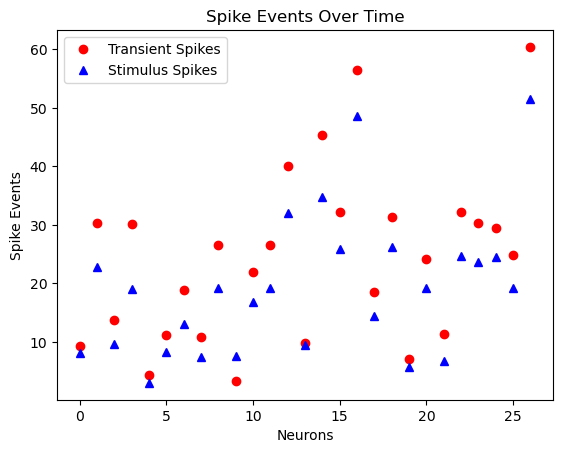

In [150]:
'''
Feature extraction
'''

def stimulus_data_interval(data, onset, end):
        # Time bin index
    bin_duration = 50  # 50 ms per bin
    start_index = int(onset * 1000 / bin_duration)
    end_index = int(end * 1000 / bin_duration)
    time_window_data = data[:, :, start_index:end_index]
    num_time_bins = end_index - start_index
    return time_window_data, num_time_bins
    
def max_peak_val(exp_data_matrix):
    max_peak = (exp_data_matrix[:,:,int(stimulus_onset):int(stimulus_end)])
    max_peak_values = np.max(exp_data_matrix, axis=2)
    #averaged across the trials
    average_max_peak_values = np.mean(max_peak_values, axis=1)
    #size is 27 by 1
    return average_max_peak_values
    
    
'''
Firing rate over 1.5 s
'''
def transcient_firing_rate(data_matrix):
    stim_data, num_time_bins = stimulus_data_interval(data_matrix, 20, 21.5)
    

    # Calculate the total number of spikes within the window for each neuron and trial
    #neuron*trisl*tim
    total_spikes = np.sum(stim_data, axis=2)
    firing_rate = total_spikes / (num_time_bins * 50 / 1000)
    #27 neurons
    avergae_firing_rate = np.mean(firing_rate, axis = 1)
    return avergae_firing_rate


def stimulus_firing_rate(data_matrix):
    max_peak_data = (data_matrix[:,:,int(stimulus_onset):int(stimulus_end)])
    total_spikes = np.sum(max_peak_data, axis=2)
    firing_rate = total_spikes / (80 * 50 / 1000)
    #27 neurons
    avergae_firing_rate = np.mean(firing_rate, axis = 1)
    return avergae_firing_rate
    
def plot_firing_rates(trans_time_val, stim_time_vals):
    fig, ax = plt.subplots()

    # Plot the transient time spikes (you can customize the color and style)
    ax.plot(np.arange(27), trans_time_val, 'ro', label='Transient Spikes')

    # Plot the stimulus time spikes (you can customize the color and style)
    ax.plot(np.arange(27), stim_time_vals , 'b^', label='Stimulus Spikes')

    # You can add labels, titles, and other customizations as needed
    ax.set_xlabel('Neurons')
    ax.set_ylabel('Spike Events')
    ax.set_title('Spike Events Over Time')
    ax.legend(loc='best')

    # Show the plot
    plt.show()


max_peak_val(C1_1_array)
trans = transcient_firing_rate(C1_1_array)
stim = stimulus_firing_rate(C1_1_array)
plot_firing_rates(trans,stim)

(27, 5, 80)


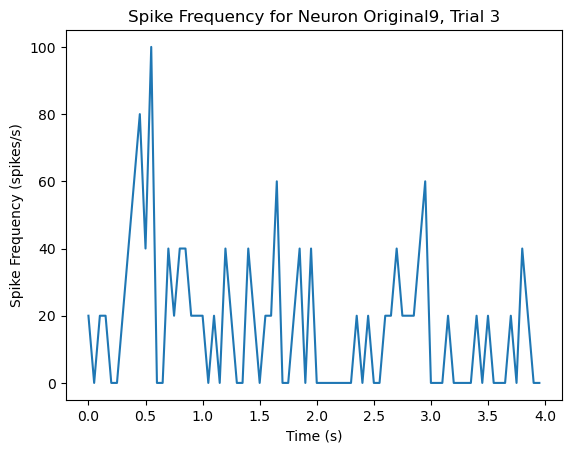

(27, 5, 80)


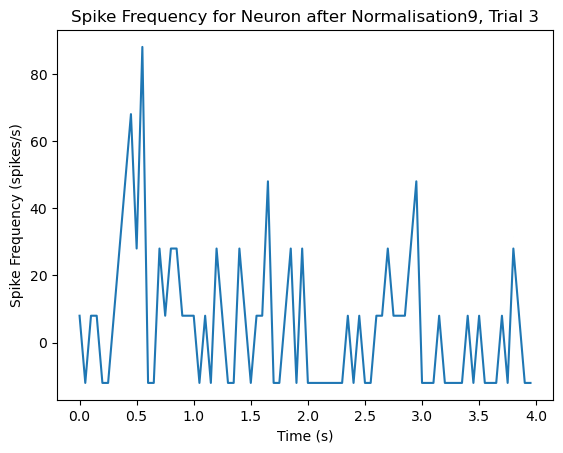

(27, 5, 80)


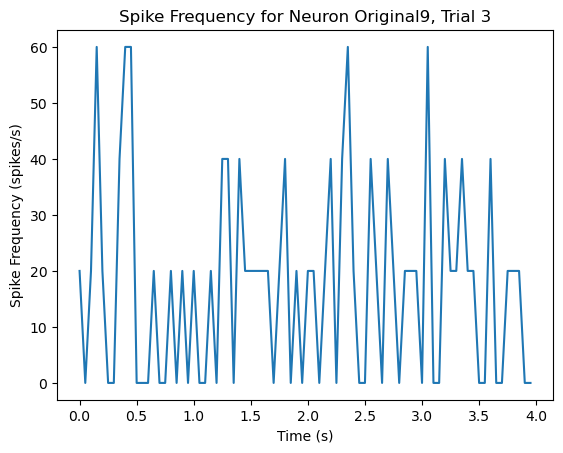

(27, 5, 80)


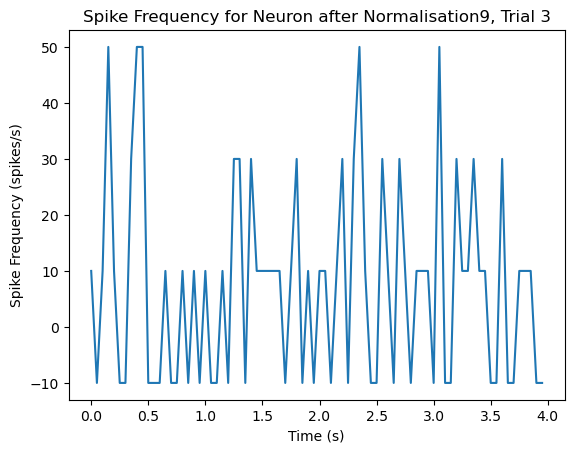

(27, 5, 80)


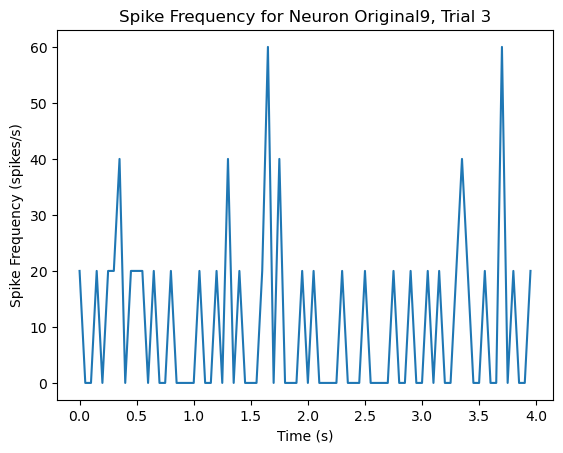

(27, 5, 80)


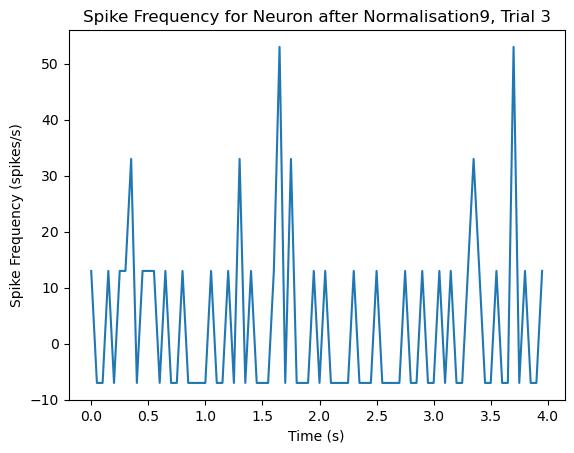

(81,)
(27, 5, 80)


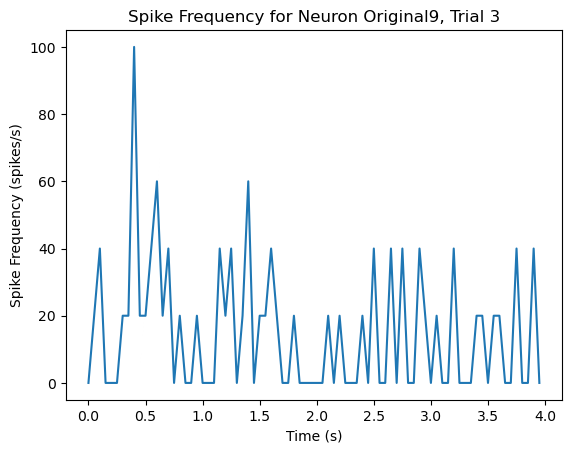

(27, 5, 80)


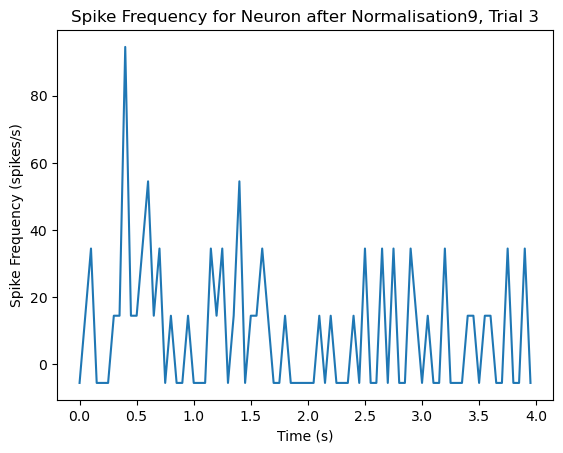

(27, 5, 80)


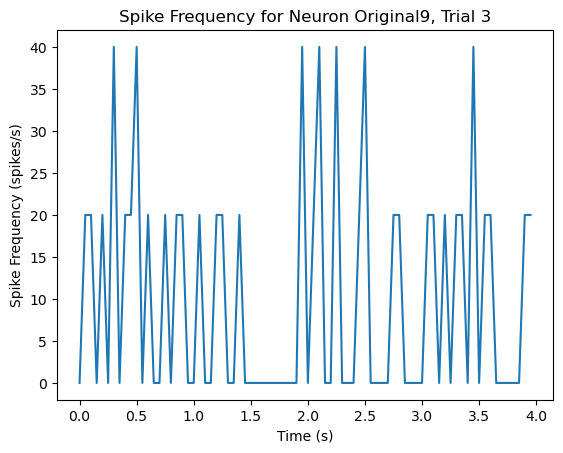

(27, 5, 80)


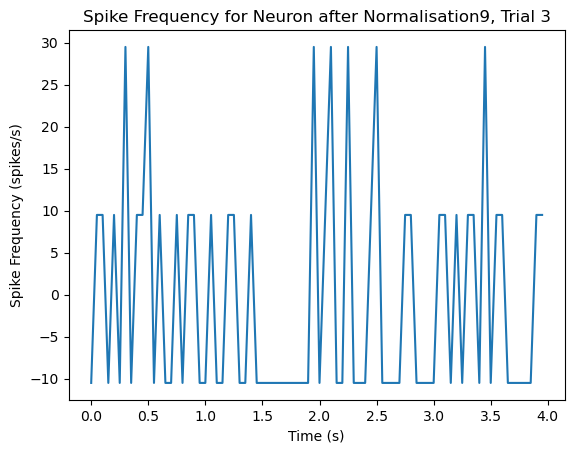

(27, 5, 80)


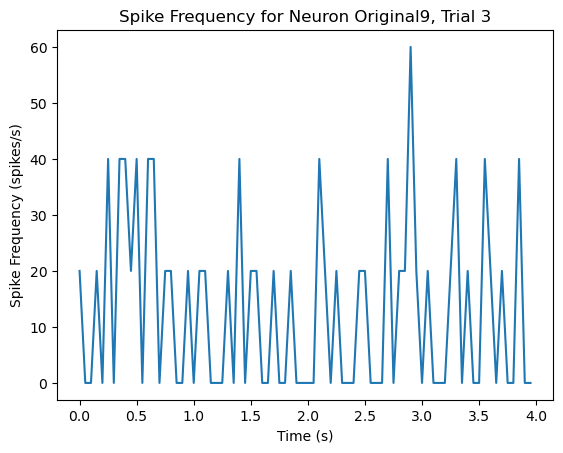

(27, 5, 80)


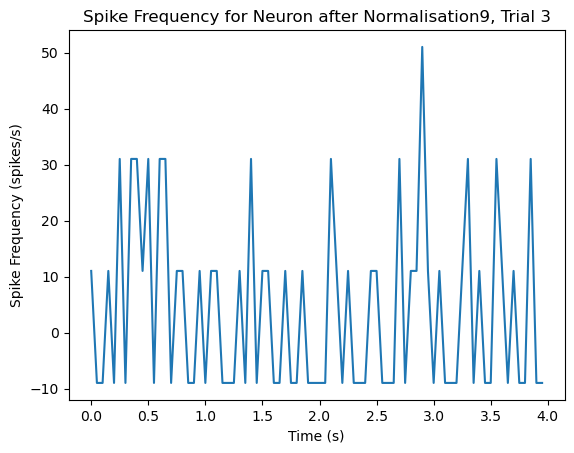

(81,)
Shape of X_train (3, 81)
Shape of Y_train (81,)


In [151]:
'''
Make our feature input vectors and output vectors to test on
'''

'''
Loop to do this for all our training files

'''
def normalise_all_data(training_data):
    #goes through cancer,mineral,healthy
    peak_val_f, trans_firing_rate_f, total_firing_rate_f, labels_f = [],[],[],[] 
    for index,exp in enumerate(training_data):
        normalised_data = normalise_peak_values(exp)
        peak_vals = max_peak_val(normalised_data)       
        trans_firing_rate = transcient_firing_rate(normalised_data)
        total_firing_rate = stimulus_firing_rate(normalised_data)
        labels = np.zeros(27)
        if index == 1:
            labels =  np.ones(27)
        elif index == 2:
            labels = 2 * np.ones(27)
        peak_val_f.append(peak_vals)
        trans_firing_rate_f.append(trans_firing_rate)
        total_firing_rate_f.append(total_firing_rate)
        labels_f.append(labels)
    peak_vals_combined = np.array(peak_val_f).flatten()
   
    print(peak_vals_combined.shape)
    trans_firing_rate_combined = np.array(trans_firing_rate_f).flatten()
    total_firing_rate_combined = np.array(total_firing_rate_f).flatten()
    labels_combined = np.concatenate(labels_f)
    X_train = np.vstack((peak_vals_combined, trans_firing_rate_combined, total_firing_rate_combined))
    return X_train, labels_combined
 
        
        
        
#Create a feature vector (i.e for our x_train)
#feature_matrix = np.concatenate((array1, array2, array3, array4), axis=1)


#X_train = np.vstack((neuron_data_class_cancer, neuron_data_class_healthy, neuron_data_class_mineral))

X_train, y_train = normalise_all_data(all_training_data)
X_test, y_test = normalise_all_data(all_testing_data)
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", y_train.shape)


In [152]:
'''
Train Model
'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

X_train = X_train.T
# Train the SVM model using the training data
svm_classifier.fit(X_train, y_train)


#27 by 3
#
X_test = X_test.T
print("Tets", X_test.shape)
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print a classification report with additional metrics
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

#Sigmoid: 37%, 42%, 41%, 28%
#poly': 40%, 33%, 52% , 7%
#precision-> how many of the predicted samples are actually positive
#recall: how many of the actyal positive instances are predicted correctly
#F(x, xj) = exp(-gamma * ||x - xj||^2) ->rbf

Tets (81, 3)
Accuracy: 0.48148148148148145
              precision    recall  f1-score   support

         0.0       0.56      0.52      0.54        27
         1.0       0.41      0.78      0.54        27
         2.0       0.80      0.15      0.25        27

    accuracy                           0.48        81
   macro avg       0.59      0.48      0.44        81
weighted avg       0.59      0.48      0.44        81



In [139]:
'''
Random Forest

'''
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.41
Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.48      0.53        27
         1.0       0.39      0.63      0.48        27
         2.0       0.20      0.11      0.14        27

    accuracy                           0.41        81
   macro avg       0.39      0.41      0.38        81
weighted avg       0.39      0.41      0.38        81



In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.48      0.51        27
         1.0       0.44      0.78      0.56        27
         2.0       0.56      0.19      0.28        27

    accuracy                           0.48        81
   macro avg       0.51      0.48      0.45        81
weighted avg       0.51      0.48      0.45        81



In [107]:
#Feature extraction for more complicated functions

#trial_data = [1, 2, 3, 2, 1]
# trial_data[1:-1] = [2, 3, 2]
# trial_data[:-2] = [1, 2, 3]
# trial_data[2:] = [3, 2, 1]

# (trial_data[1:-1] > trial_data[:-2]) checks if [2, 3, 2] > [1, 2, 3]
#(trial_data[1:-1] > trial_data[2:]) checks if [2, 3, 2] > [3, 2, 1]
#true-> true & true in array

from scipy.signal import find_peaks
#peaks, _ = find_peaks(C1_1_array, axis = 2)

def peak_width(num_neurons, num_trials, num_time_bins):
    global time_bin_width, stimulus_onset, stimulus_end
    
    peak_widths = np.zeros((num_neurons, num_trials))
    
    for trial in range(num_trials):
        for neuron in range(num_neurons):
            trial_data = C1_1_array[neuron, trial, :]
            #gets trial data for specific trial across all time bins

            
            peak_indices = np.where((trial_data[1:-1] > trial_data[:-2]) & (trial_data[1:-1] > trial_data[2:]))[0] + 1

            # Find the peak with the maximum value within the stimulus window
            max_peak_width = 0
            max_peak_index = 0
            for peak_index in peak_indices:
                if stimulus_onset <= peak_index <= stimulus_end:
                    if trial_data[peak_index] > max_peak_width:
                        max_peak_width = trial_data[peak_index]
                        max_peak_index = peak_index

            # Calculate the width of the maximum peak in terms of seconds, fall to half of the peak val
            left = max_peak_index
            while left > stimulus_onset and trial_data[left] > trial_data[max_peak_index] / 2:
                left -= 1
            right = max_peak_index
            while right < stimulus_end and trial_data[right] > trial_data[max_peak_index] / 2:
                right += 1
            peak_width = (right - left) * time_bin_width  # Convert to seconds
            peak_widths[neuron, trial] = peak_width
            
    #each nueron each trial
    return peak_widths
        

#spikes/num_of_sec(50)

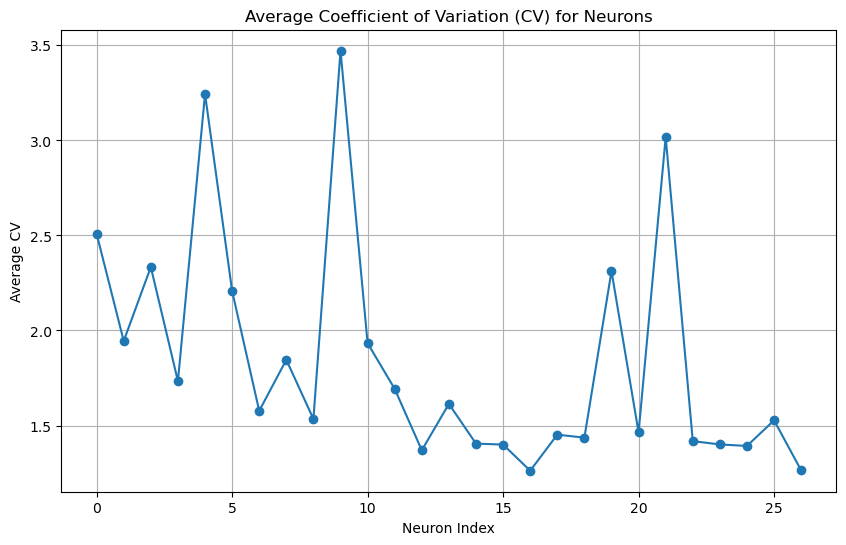

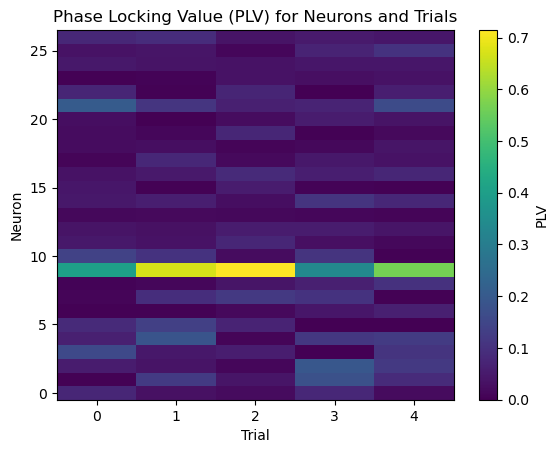

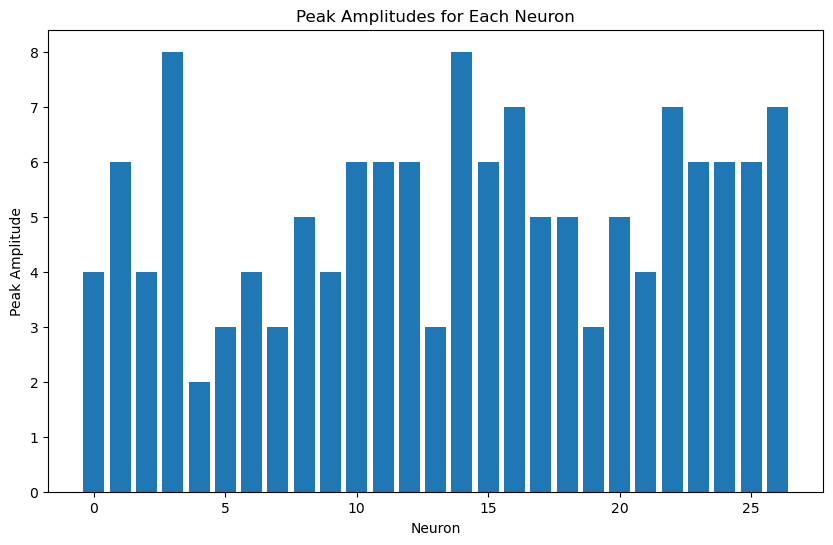

In [7]:
#New features plot visualisation
#CV = σ / μ -> 


num_neurons = C1_1_array.shape[0]
num_trials = C1_1_array.shape[1]
num_time_bins = C1_1_array.shape[2]
time_bin_width = 0.05  # 50 ms

# Initialize an array to store the CV for each neuron and trial
cv_values = np.zeros((num_neurons, num_trials))
plv_values = np.zeros((num_neurons, num_trials))


# ref signal -> should change it to either:
#theta or gamma rhythms look. up Local Field Potential (LFP)
reference_signal = np.sin(np.linspace(0, 4 * np.pi, num_time_bins))


'''
Calculate co-efficient of variation : standard deviation/ mean 
CV close to 1 indicates a Poisson-like process with regular and evenly spaced spikes, while a CV significantly greater than 1 suggests irregularity.
PHASE LOCKING VALUE COMPARING TO 
'''

# Iterate through neurons and trials
for neuron in range(num_neurons):
    for trial in range(num_trials):
        # Calculate ISIs for the current neuron and trial
        
        #NEED TO CHANGE THIS 
        #inter-spike intervals (ISIs)
        #CALCULATE THE TIME intervals between successive spikes (MAX_SPIKES)
        isitimes = np.diff(C1_1_array[neuron, trial, :])

        # Calculate the mean and standard deviation of ISIs
        mean_isi = np.mean(isitimes)
        std_isi = np.std(isitimes)

        # Calculate the CV for the current neuron and trial
        cv = std_isi / mean_isi

        # Store the CV value in the array
        cv_values[neuron, trial] = cv
        
        # Calculate phase values for each spike
        spike_times = np.where(C1_1_array[neuron, trial, :] == 1)[0]
        #From our ref signal
        phase_values = np.angle(reference_signal[spike_times])

        # Calculate PLV
        plv = np.abs(np.mean(np.exp(1j * phase_values)))
        plv_values[neuron, trial] = plv
        
'''

'''

average_cv = np.mean(cv_values, axis=1)

# Create a line graph to visualize the average CV for each neuron
neuron_indices = np.arange(num_neurons)  # X-axis values


'''
Phase locking -> spikes of the neurons are syncrohnised and locked to a specific part 
'''
plt.figure(figsize=(10, 6))
plt.plot(neuron_indices, average_cv, marker='o', linestyle='-')
plt.xlabel('Neuron Index')
plt.ylabel('Average CV')
plt.title('Average Coefficient of Variation (CV) for Neurons')
plt.grid(True)
plt.show()


plt.imshow(plv_values, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='PLV')
plt.xlabel('Trial')
plt.ylabel('Neuron')
plt.title('Phase Locking Value (PLV) for Neurons and Trials')
plt.show()


#max amplitude by collapsing across all time bins and all trials for each specific neurons
'''
PEAK AMPLITUDE FOR EACH NEURON
'''
peak_amplitudes = np.max(C1_1_array, axis=(1, 2))

plt.figure(figsize=(10, 6))
plt.bar(range(num_neurons), peak_amplitudes)
plt.xlabel('Neuron')
plt.ylabel('Peak Amplitude')
plt.title('Peak Amplitudes for Each Neuron')
plt.show()

(27,)


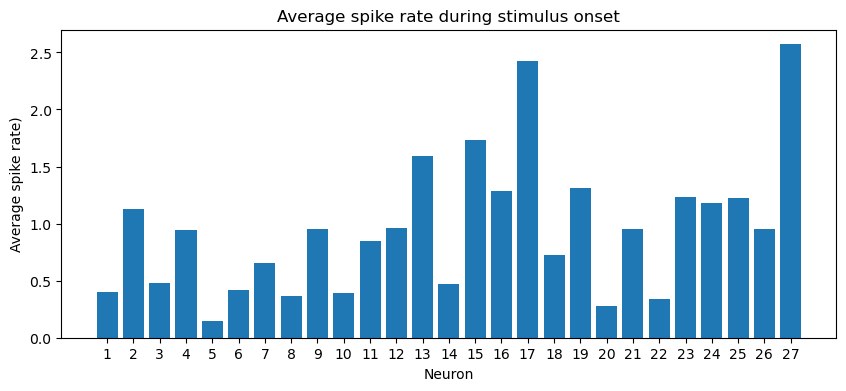

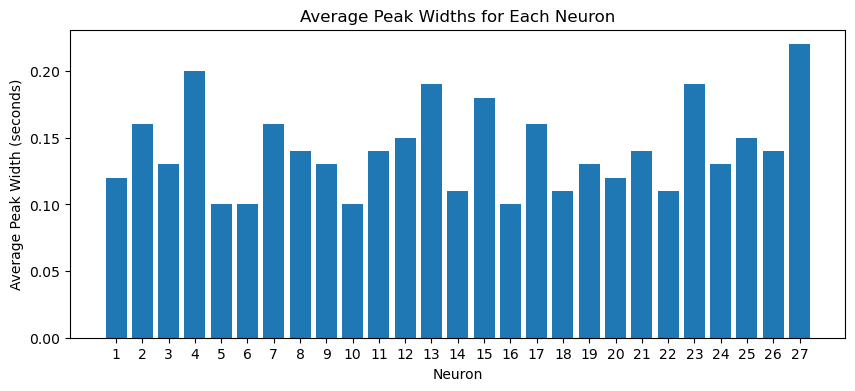

NameError: name 'array1' is not defined

In [37]:
#Feature extraction basic no functions


# Initialize an empty array to store firing rates
num_neurons, num_trials, num_time_bins = C1_1_array.shape
firing_rates = np.zeros((num_neurons, num_trials))

'''
calculate the spike rates average through simulus onset along trial and time bin to get avg
 SPIKE_sum_from sim_onset/ total number of trials times time bins 
'''
spike_rates_in_stimulus = C1_1_array[:, :, stimulus_onset:stimulus_end + 1]
average_spike_rates = np.mean(spike_rates_in_stimulus, axis=(1, 2))
print(average_spike_rates.shape)


'''
'''
plt.figure(figsize=(10, 4))
plt.bar(np.arange(num_neurons), average_spike_rates)
plt.xlabel('Neuron')
plt.ylabel('Average spike rate)')
plt.title('Average spike rate during stimulus onset')
plt.xticks(np.arange(num_neurons), np.arange(1, num_neurons + 1))  # Label the x-axis with neuron numbers
plt.show()


spike_rates_in_transcient_state = C1_1_array[:, :, 0:transcient_end + 1]
asr_transcient = np.mean(spike_rates_in_transcient_state, axis=(1, 2))


peak_widths = peak_width(num_neurons, num_trials, num_time_bins)
average_peak_widths = np.mean(peak_widths, axis=1)

plt.figure(figsize=(10, 4))
plt.bar(np.arange(num_neurons), average_peak_widths)
plt.xlabel('Neuron')
plt.ylabel('Average Peak Width (seconds)')
plt.title('Average Peak Widths for Each Neuron')
plt.xticks(np.arange(num_neurons), np.arange(1, num_neurons + 1))  # Label the x-axis with neuron numbers
plt.show()


    
'''
creating our feature vector to train model
'''
#Create a feature vector (i.e for our x_train)
feature_matrix = np.concatenate((array1, array2, array3, array4), axis=1)


X_train = np.vstack((neuron_data_class_cancer, neuron_data_class_healthy, neuron_data_class_mineral))
y_train = 



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM model using the training data
svm_classifier.fit(X_train, y_train)




# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print a classification report with additional metrics
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)